## <span style="color: #706d22">Importation des paquets</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from tabulate import tabulate

from scipy.stats import chisquare

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

from imblearn.over_sampling import ADASYN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import xgboost

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, jaccard_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

## <span style="color: #706d22">Chargement des données et description des colonnes</span>

In [2]:
df = pd.read_csv('nba_logreg.csv')

df

Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  ...   

      FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0     2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1     3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2     1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3     1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4     1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  
...   ...   ...   ...   ...  ...  ...  ...  ...  ...          ...  
1335  1.5  79.2   0.4   0.8  1.2  2.5  0.6  0.2  0.8          0.0  
1336  1.0  79.4   0.4   1.1  1.5  2.3  0.8  0.0  1.3          1.0  
1337  1.6  64.3   1.5   2.3  3.8  0.3  0.3  0.4  0.9          0.0  
1338  1.8  62.5   0.2   0.4  0.7  2.2  0.4  0.1  0.8          1.0  
1339  1.0  67.3   0.2   0.7  0.9  1.4  0.7  0.1  0.9          1.0  

[1340 rows x 21 columns]

Ce dataset contient des statistiques sportives sur les joueurs débutants de la NBA. L’objectif est de fournir un classifier permettant de prédire qu’un joueur vaut le coup d’investir sur lui car il va durer plus de 5 ans en NBA en s’appuyant sur ses statistiques sportives. Ce modèle vise a conseiller des investisseur cherchant à capitaliser sur de futurs talents de la NBA.

<table>
<tr>
    <th>Colonne</th>
    <th>Description</th>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">Name</td>
    <td>Player's name</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">GP</td>
    <td>Games Played</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">MIN</td>
    <td>Minutes Played</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">PTS</td>
    <td>Points Per Game</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">FGM</td>
    <td>Field Goals Made</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">FGA</td>
    <td>Field Goals Attempts</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">FG%</td>
    <td>Field Goals Percent</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">3P Made</td>
    <td>3 Points Made</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">3PA</td>
    <td>3 Points Attempts</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">3P%</td>
    <td>3 Points Percent</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">FTM</td>
    <td>Free Throws Made</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">FTA</td>
    <td>Free Throws Attempts</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">FT%</td>
    <td>Free Throws Percent</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">OREB</td>
    <td>Offensive Rebounds</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">DREB</td>
    <td>Defensive Rebounds</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">REB</td>
    <td>Rebounds</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">AST</td>
    <td>Assists</td>
</tr>

<tr>
    <td style="color: #ab1e3e;font-weight: bold;">STL</td>
    <td>Steals</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">BLK</td>
    <td>Blocks</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">TOV</td>
    <td>Turnovers</td>
</tr>
    
<tr>
    <td style="color: #ab1e3e;font-weight: bold;">TARGET_5Yrs</td>
    <td>Outcome :1 if career length ≥ 5 yrs, else 0</td>
</tr>

</table>

## <span style="color: #706d22">Nettoyage des données</span>

Cette partie concerne la préparation des données (valeurs manquantes, types des données, ...).

### <span style="color: #1c873e;">1- Valeurs manquantes :</span>

Dans un premier temps, nous allons traiter les valeurs manquantes présentes dans notre dataset.

In [3]:
cols = df.columns.tolist()

pd.DataFrame({
              'Colonne': 
              cols,
              
              'Nombre de valeurs manquantes': 
              [df[col].isnull().sum() for col in cols],
              
              'Pourcentage de valeurs manquantes': 
              [round(((df[col].isnull().sum())*100/(len(df.index))),2).astype(str)+' %' for col in cols],
              
              'Indices des valeurs manquantes': 
              [list(df.loc[df[col].isnull()].index.values) for col in cols]
             })

Colonne  Nombre de valeurs manquantes  \
0          Name                             0   
1            GP                             0   
2           MIN                             0   
3           PTS                             0   
4           FGM                             0   
5           FGA                             0   
6           FG%                             0   
7       3P Made                             0   
8           3PA                             0   
9           3P%                            11   
10          FTM                             0   
11          FTA                             0   
12          FT%                             0   
13         OREB                             0   
14         DREB                             0   
15          REB                             0   
16          AST                             0   
17          STL                             0   
18          BLK                             0   
19          TOV                             0   
20  TARGET_5Yrs                             0   

   Pourcentage de valeurs manquantes  \
0                              0.0 %   
1                              0.0 %   
2                              0.0 %   
3                              0.0 %   
4                              0.0 %   
5                              0.0 %   
6                              0.0 %   
7                              0.0 %   
8                              0.0 %   
9                             0.82 %   
10                             0.0 %   
11                             0.0 %   
12                             0.0 %   
13                             0.0 %   
14                             0.0 %   
15                             0.0 %   
16                             0.0 %   
17                             0.0 %   
18                             0.0 %   
19                             0.0 %   
20                             0.0 %   

                       Indices des valeurs manquantes  
0                                                  []  
1                                                  []  
2                                                  []  
3                                                  []  
4                                                  []  
5                                                  []  
6                                                  []  
7                                                  []  
8                                                  []  
9   [338, 339, 340, 358, 386, 397, 507, 509, 510, ...  
10                                                 []  
11                                                 []  
12                                                 []  
13                                                 []  
14                                                 []  
15                                                 []  
16                                                 []  
17                                                 []  
18                                                 []  
19                                                 []  
20                                                 []

Seule la colonne <i>"3P%"</i> contient des valeurs nulles, qui sont au nombre de 11 :

In [4]:
df.loc[df.isna().any(axis=1), ['Name', '3P Made', '3PA', '3P%']]

Name  3P Made  3PA  3P%
338     Ken Johnson      0.0  0.0  NaN
339     Ken Johnson      0.0  0.0  NaN
340   Pete Williams      0.0  0.0  NaN
358   Melvin Turpin      0.0  0.0  NaN
386    Jim Petersen      0.0  0.0  NaN
397   Tom Scheffler      0.0  0.0  NaN
507    Sam Williams      0.0  0.0  NaN
509   Kurt Nimphius      0.0  0.0  NaN
510  Pete Verhoeven      0.0  0.0  NaN
521       Jim Smith      0.0  0.0  NaN
559    Jeff Wilkins      0.0  0.0  NaN

En effet, nous avons : $\text{3P%} = \frac{\text{3P Made}}{\text{3PA}}$

Les joueurs ci-dessus n'ont jamais tenté un panier à 3 durant la saison, et donc le nombre de paniers à 3 tentés par match est égal à 0 pour ces joueurs. Or, la division par 0 n'est pas possible, on obtient des <i>NaN</i> au niveau de la colonne <i>"3P%</i>.

Pour remédier à ça, on remplace les valeurs manquantes de <i>"3P%"</i> par 0, car il est logique de dire que les joueurs n'ayant jamais tenté de tir à 3 points ont un pourcentage de réussite de 0%.

In [5]:
df['3P%'] = df['3P%'].fillna(0)

### <span style="color: #1c873e;">2- Colonnes 'FGM', 'FGA' et 'FG%' :</span>

- $\text{FGM} = \text{Nombre de tirs réussis par match} = \frac{\text{Nombre de tirs réussis durant la saison}}{\text{Nombre de matchs joués}}$


- $\text{FGA} = \text{Nombre de tirs tentés par match} = \frac{\text{Nombre de tirs tentés durant la saison}}{\text{Nombre de matchs joués}}$


- $\text{FG%} = \text{Pourcentage de tirs réussis} = \frac{\text{FGM}}{\text{FGA}}$

Et puisque les colonnes <i>"FGM"</i> et <i>"FGA"</i> sont arrondies à un chiffre après la virgule, on peut dire que :

$$ \text{FG%} ≈ \frac{\text{FGM}}{\text{FGA}} $$

Puisque le nombre de tirs réussis durant la saison est inférieur ou égal au nombre de tirs tentés, on vérifie les deux conditions suivantes :

- 0 ≤ FGM ≤ FGA
- 0 ≤ FG% ≤ 100

In [6]:
condition_1 = df['FGM'].between(0, df['FGA'])
condition_2 = df['FG%'].between(0, 100)

### Condition 1 ###
if condition_1.all():
    print("La condition \033[94m'0 ≤ FGM ≤ FGA'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ FGM ≤ FGA'\033[0m n'est pas vérifiée.")
    
### Condition 2 ###
if condition_2.all():
    print("La condition \033[94m'0 ≤ FG% ≤ 100'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ FG% ≤ 100'\033[0m n'est pas vérifiée.")

La condition '0 ≤ FGM ≤ FGA' est vérifiée pour toutes les lignes.
La condition '0 ≤ FG% ≤ 100' est vérifiée pour toutes les lignes.


Si un joueur n'a jamais tenté de tirs (FGA = 0), alors FGM = 0, et donc on peut considérer que le pourcentage de réussite FG% est aussi nul.

In [7]:
df.loc[df['FGA'] == 0, 'FG%'] = 0

### <span style="color: #1c873e;">3- Colonnes '3P Made', '3PA' et '3P%' :</span>

- $\text{3P Made} = \text{Nombre de tirs à 3 points réussis par match} = \frac{\text{Nombre de tirs à 3 points réussis durant la saison}}{\text{Nombre de matchs joués}}$


- $\text{3PA} = \text{Nombre de tirs à 3 points tentés par match} = \frac{\text{Nombre de tirs à 3 points tentés durant la saison}}{\text{Nombre de matchs joués}}$


- $\text{3P%} = \text{Pourcentage de tirs à 3 points réussis} = \frac{\text{3P Made}}{\text{3PA}}$

Et puisque les colonnes <i>"3P Made"</i> et <i>"3PA"</i> sont arrondies à un chiffre après la virgule, on peut dire que :

$$ \text{3P%} ≈ \frac{\text{3P Made}}{\text{3PA}} $$

Puisque le nombre de tirs à 3 points réussis durant la saison est inférieur ou égal au nombre de tirs à 3 points tentés, on vérifie les deux conditions suivantes :

- 0 ≤ 3P Made ≤ 3PA
- 0 ≤ 3P% ≤ 100

In [8]:
condition_1 = df['3P Made'].between(0, df['3PA'])
condition_2 = df['3P%'].between(0, 100)

### Condition 1 ###
if condition_1.all():
    print("La condition \033[94m'0 ≤ 3P Made ≤ 3PA'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ 3P Made ≤ 3PA'\033[0m n'est pas vérifiée.")
    
### Condition 2 ###
if condition_2.all():
    print("La condition \033[94m'0 ≤ 3P% ≤ 100'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ 3P% ≤ 100'\033[0m n'est pas vérifiée.")

La condition '0 ≤ 3P Made ≤ 3PA' est vérifiée pour toutes les lignes.
La condition '0 ≤ 3P% ≤ 100' est vérifiée pour toutes les lignes.


Si un joueur n'a jamais tenté de tirs à 3 points (3PA = 0), alors 3P Made = 0, et donc on peut considérer que le pourcentage de réussite 3P% est aussi nul.

In [9]:
df.loc[df['3PA'] == 0, '3P%'] = 0

Puisque les tirs à 3 points sont considérés comme des tirs, donc :
- $ 0 ≤ \text{Nombre de tirs à 3 points réussis durant la saison} ≤ \text{Nombre de tirs réussis durant la saison} $
- $ 0 ≤ \text{Nombre de tirs à 3 points tentés durant la saison} ≤ \text{Nombre de tirs tentés durant la saison} $

Et donc :
- 0 ≤ 3P Made ≤ FGM
- 0 ≤ 3PA ≤ FGA

Vérifions ces deux conditions :

In [10]:
condition_1 = df['3P Made'].between(0, df['FGM'])
condition_2 = df['3PA'].between(0, df['FGA'])

### Condition 1 ###
if condition_1.all():
    print("La condition \033[94m'0 ≤ 3P Made ≤ FGM'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ 3P Made ≤ FGM'\033[0m n'est pas vérifiée.")
    
### Condition 2 ###
if condition_2.all():
    print("La condition \033[94m'0 ≤ 3PA ≤ FGA'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ 3PA ≤ FGA'\033[0m n'est pas vérifiée.")

La condition '0 ≤ 3P Made ≤ FGM' est vérifiée pour toutes les lignes.
La condition '0 ≤ 3PA ≤ FGA' est vérifiée pour toutes les lignes.


### <span style="color: #1c873e;">4- Colonnes 'FTM', 'FTA' et 'FT%' :</span>

- $\text{FTM} = \text{Nombre de lancers francs réussis par match} = \frac{\text{Nombre de lancers francs réussis durant la saison}}{\text{Nombre de matchs joués}}$


- $\text{FTA} = \text{Nombre de lancers francs tentés par match} = \frac{\text{Nombre de lancers francs tentés durant la saison}}{\text{Nombre de matchs joués}}$


- $\text{FT%} = \text{Pourcentage de lancers francs réussis} = \frac{\text{FTM}}{\text{FTA}}$

Et puisque les colonnes <i>"FTM"</i> et <i>"FTA"</i> sont arrondies à un chiffre après la virgule, on peut dire que :

$$ \text{FT%} ≈ \frac{\text{FTM}}{\text{FTA}} $$

Puisque le nombre de lancers francs réussis durant la saison est inférieur ou égal au nombre de lancers francs tentés, on vérifie les deux conditions suivantes :

- 0 ≤ FTM ≤ FTA
- 0 ≤ FT% ≤ 100

In [11]:
condition_1 = df['FTM'].between(0, df['FTA'])
condition_2 = df['FT%'].between(0, 100)

### Condition 1 ###
if condition_1.all():
    print("La condition \033[94m'0 ≤ FTM ≤ FTA'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ FTM ≤ FTA'\033[0m n'est pas vérifiée.")
    
### Condition 2 ###
if condition_2.all():
    print("La condition \033[94m'0 ≤ FT% ≤ 100'\033[0m est vérifiée pour toutes les lignes.")
else:
    print("Il y a des lignes où la condition \033[94m'0 ≤ FT% ≤ 100'\033[0m n'est pas vérifiée.")

La condition '0 ≤ FTM ≤ FTA' est vérifiée pour toutes les lignes.
La condition '0 ≤ FT% ≤ 100' est vérifiée pour toutes les lignes.


Si un joueur n'a jamais tenté de lancers francs (FTA = 0), alors FTM = 0, et donc on peut considérer que le pourcentage de réussite FT% est aussi nul.

In [12]:
df.loc[df['FTA'] == 0, 'FT%'] = 0

### <span style="color: #1c873e;">5- Types des colonnes :</span>

In [13]:
# Types des colonnes
df.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

$
\text{TARGET_5Yrs} = \left\{
    \begin{array}{ll}
        1 & \mbox{si le joueur en question vaut le coup d’investir sur lui car il va durer plus de 5 ans en NBA} \\
        0 & \mbox{sinon}
    \end{array}
\right.
$

In [14]:
df['TARGET_5Yrs'].unique()

array([0., 1.])

Cette colonne admet deux valeurs entières uniquement (0 et 1), nous devons la transformer en <i>int</i> :

In [15]:
df['TARGET_5Yrs'] = df['TARGET_5Yrs'].astype('int64')

La colonne <i>"GP"</i> correspond au nombre de matchs joués, qui est à son tour un nombre entier :

In [16]:
df['GP'] = df['GP'].astype('int64')

## <span style="color: #706d22">Description des données</span>

### <span style="color: #1c873e;">1- Histogrammes et Boxplots :</span>

On donne ici les histogrammes et les boxplots pour toutes les variables sauf <i>"Name"</i> et la variable cible <i>"TARGET_5Yrs"</i>, afin de voir leurs distributions et visualiser les valeurs aberrantes :

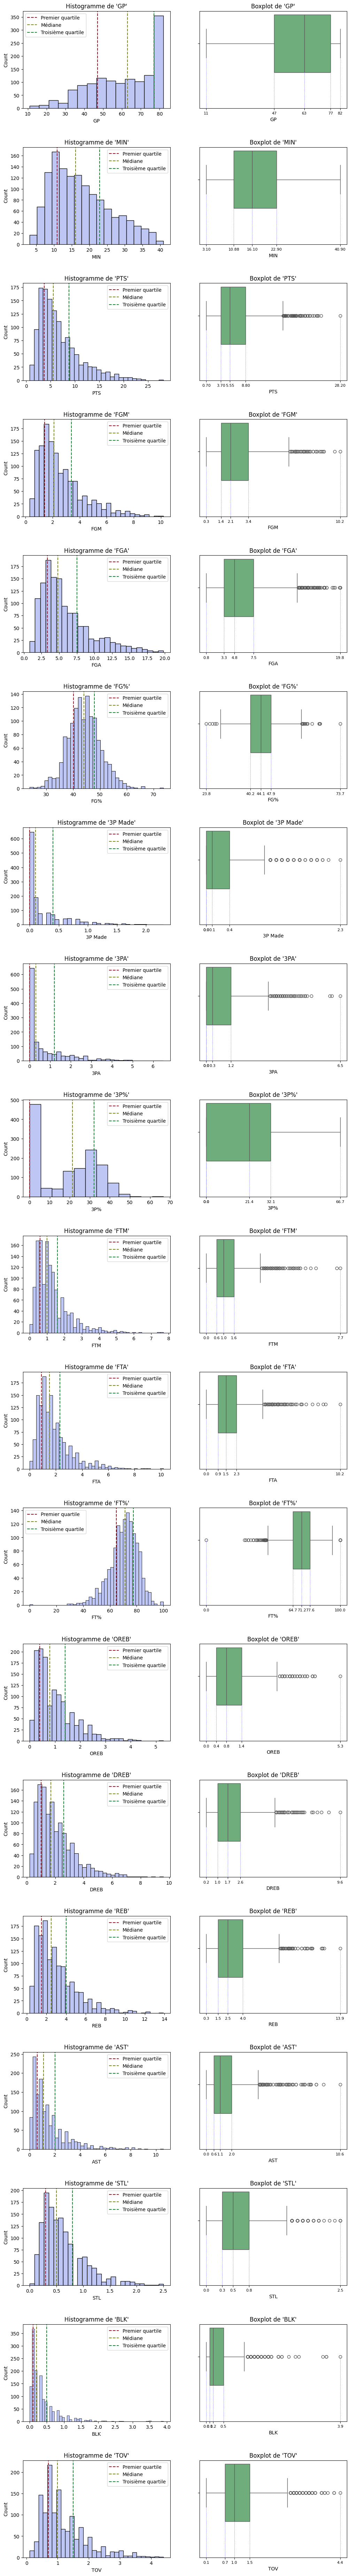

In [17]:
columns_to_plot = df.columns[1:-1]
num_columns = len(columns_to_plot)

fig, axs = plt.subplots(nrows=num_columns, ncols=2, figsize=(12, 5 * num_columns), gridspec_kw={'wspace': 0.2, 'hspace': 0.4})

for i, column in enumerate(columns_to_plot):
    quantiles = np.quantile(df[column], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

    # Histogramme
    sns.histplot(ax=axs[i, 0], data=df, x=column, color="#a8b4ef")
    axs[i, 0].set_title(f"Histogramme de '{column}'")
    axs[i, 0].set_xlabel(column)
    axs[i, 0].axvline(quantiles[1], color='#9e1120', linestyle='--', label="Premier quartile")
    axs[i, 0].axvline(quantiles[2], color='#7c8710', linestyle='--', label="Médiane")
    axs[i, 0].axvline(quantiles[3], color='#10872b', linestyle='--', label="Troisième quartile")
    axs[i, 0].legend()

    # Boxplot
    sns.boxplot(ax=axs[i, 1], data=df, x=column, color="#65b876")
    axs[i, 1].set_title(f"Boxplot de '{column}'")
    axs[i, 1].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.5, zorder=0)
    axs[i, 1].set_xticks(quantiles)
    axs[i, 1].tick_params(axis='x', labelsize=8)
    axs[i, 1].set_ylim(0.9, -0.45)

plt.show()

Nous observons que beaucoup de variables, comme <i>"REB"</i> et <i>"3P Made"</i>, présentent des valeurs aberrantes. C'est normal puisqu'il y a certains joueurs, comme Damian Lillard ou Stephen Curry, qui sont très forts aux tirs à 3 points et beaucoup meilleurs que la majorité des joueurs de la NBA. D'autres joueurs comme Shaquille O'neal sont très forts dans les rebounds.

### <span style="color: #1c873e;">2- Variable cible :</span>

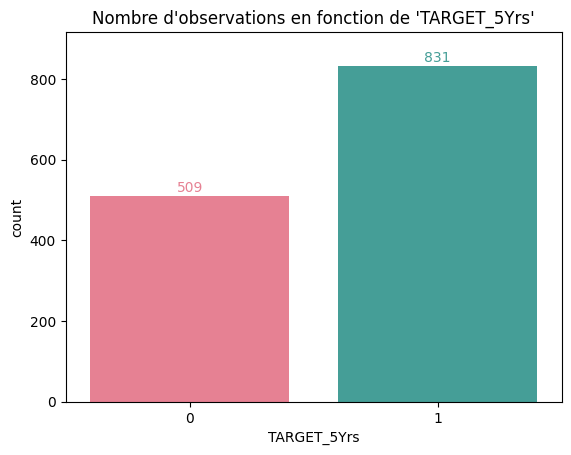

In [18]:
ax = sns.countplot(x=df['TARGET_5Yrs'], hue=df['TARGET_5Yrs'], palette="husl", legend=False)
plt.title("Nombre d'observations en fonction de 'TARGET_5Yrs'")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,
            int(p.get_height()),
            ha='center', va='bottom', fontsize=10, color=p.get_facecolor())

ax.set_ylim(0, ax.get_ylim()[1] * 1.05)

plt.show()

Le test du chi carré peut être utilisé pour vérifier si les fréquences observées des catégories de notre variable cible diffèrent significativement de ce que l'on attendrait si toutes les catégories avaient la même fréquence.

- $H_0 :$ Les catégories sont également réparties (pas de déséquilibre).
- $H_1 :$ Les catégories ne sont pas également réparties (il y a un déséquilibre).

Nous avons donc les fréquences observées _(voir le diagramme en barres ci-dessus)_, et les fréquences attendues. Si les catégories étaient également réparties, chaque catégorie aurait une fréquence attendue de $\frac{N}{k}$ où $N$ est le nombre total d'observations et $k$ est le nombre total de catégories.

Nous pouvons ensuite calculer la statistique de test suivante :

$$ χ^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i} $$

où $O_i$ est la fréquence observée de la catégorie $i$, et $E_i$ est la fréquence attendue. Donc :

$$ χ^2 = \sum_{i=1}^{k} \frac{(O_i - \frac{N}{k})^2}{\frac{N}{k}} $$

In [19]:
observed_frequencies = df['TARGET_5Yrs'].value_counts().values

num_observations = len(df)
num_categories = len(df['TARGET_5Yrs'].unique())
expected_frequencies = [num_observations / num_categories] * num_categories

chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-Square Statistic : {chi2_stat}")
print(f"P-Value : {p_value}")

alpha = 0.05

if p_value < alpha:
    print("\n➜ Rejet de H0: Les catégories sont déséquilibrées.")
else:
    print("\n➜ Non-rejet de H0: Les catégories ne sont pas déséquilibrées.")

Chi-Square Statistic : 77.37611940298507
P-Value : 1.4131352038436192e-18

➜ Rejet de H0: Les catégories sont déséquilibrées.


Pour remédier à ce problème, nous utiliserons l'algorithme <b>ADASYN</b> que nous verrons par la suite.

### <span style="color: #1c873e;">3- Matrice de corrélation :</span>

Nous allons étudier les corrélations entre les différentes variables explicatives :

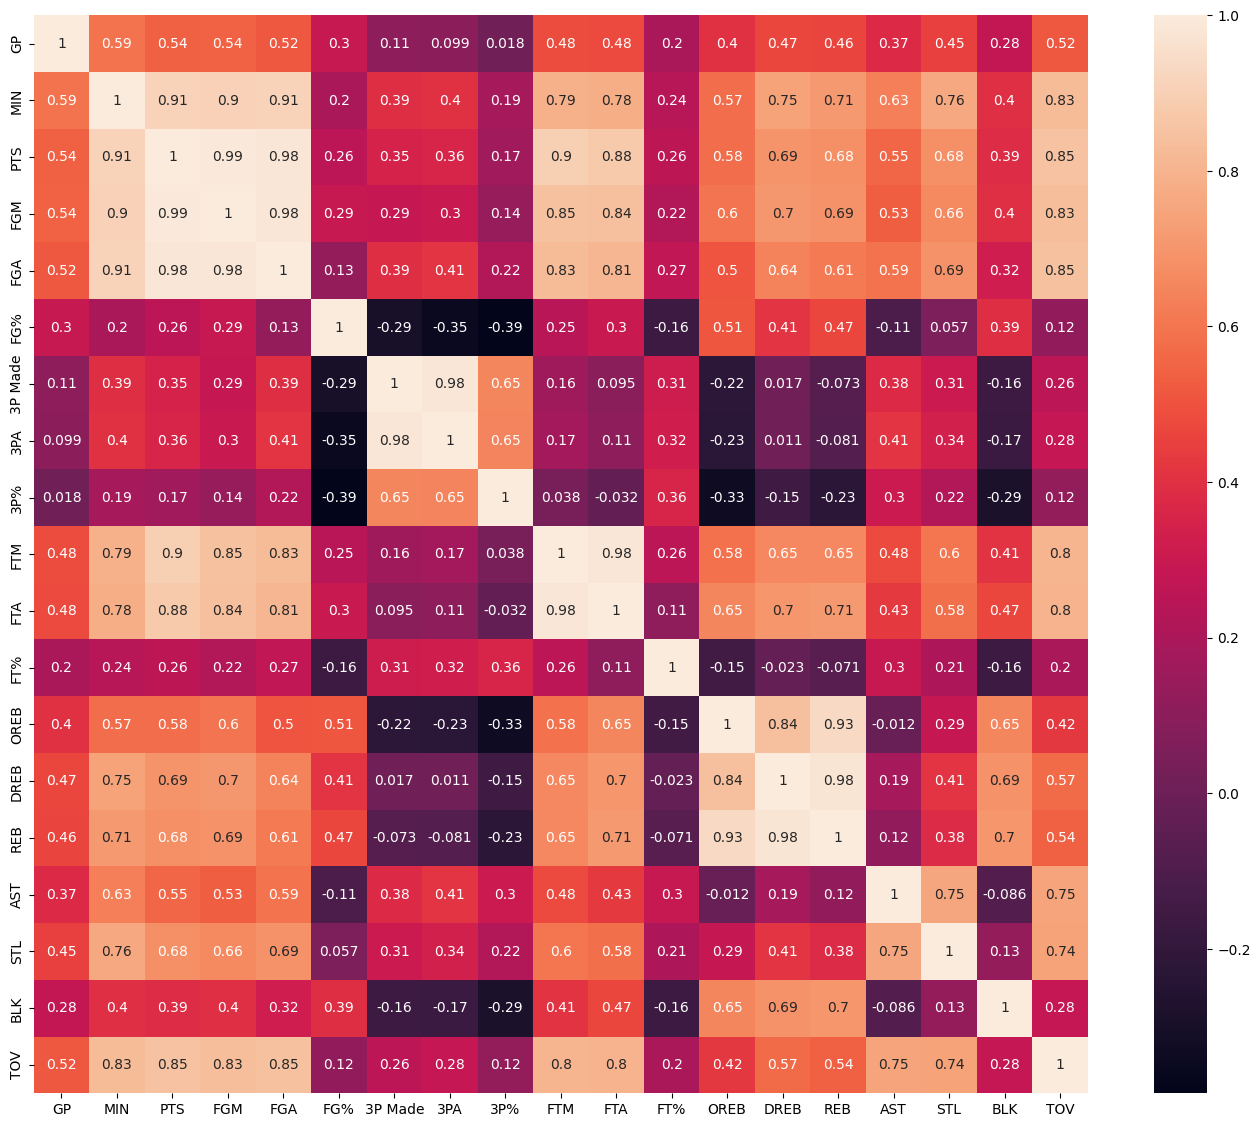

In [20]:
features = df.drop(['Name','TARGET_5Yrs'],axis=1)
target = df['TARGET_5Yrs']

plt.figure(figsize=(17,14))
sns.heatmap(features.corr(numeric_only=True), annot = True)
plt.show()

Nous observons que certaines variables présentent des corrélations très fortes entre elles, comme c'est le cas de <i>"PTS"</i> (nombre de points par match) et <i>"FGM"</i> (nombre de tirs réussis par match), avec un coefficient de corrélation de <b>0.99</b>. Cette corrélation quasi-parfaite suggère que ces deux variables capturent des aspects très similaires de la performance des joueurs. En effet, le nombre de points marqués est directement influencé par le nombre de tirs réussis, expliquant ainsi la forte interdépendance entre ces deux variables.

Cette forte corrélation peut indiquer une redondance des informations, ce qui pourrait potentiellement réduire l'efficacité des modèles prédictifs si elle n'est pas prise en compte. En conséquence, il serait pertinent de considérer des techniques de réduction de la multicolinéarité, telles que l'élimination d'une des variables fortement corrélées ou l'application de méthodes comme le PCA, afin d'améliorer la robustesse des modèles tout en conservant l'essence des données.

## <span style="color: #706d22">Préparation des données</span>

![Data Preparation](Data_preparation.png)

### <span style="color: #1c873e;">1- Split des données :</span>

On divise nos données en deux sets :
- Set d'entrainement (80%)
- Set de test (20%)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    stratify=target,
                                                    test_size=0.2,
                                                    random_state=10)

### <span style="color: #1c873e;">2- Déséquilibre des classes :</span>

Lors d'un problème de classification, il arrive souvent que certaines classes soient beaucoup plus représentées que d'autres (déséquilibre de classes). Sans ajustement, le modèle pourrait ignorer les classes sous-représentées, car il serait plus "facile" pour lui de bien prédire les classes majoritaires.

L'une des façons de résoudre ce problème est d'attribuer des poids à nos classes. La classe minoritaire aura le poids le plus important et la classe majoritaire aura le poids le plus faible. Ensuite, nous pouvons passer les poids à la méthode d'ajustement. L'inconvénient de cette technique est que tous les algorithmes ne prennent pas en charge le paramètre sample_weight.

L'une des techniques de déséquilibre des classes largement adoptées pour traiter les ensembles de données fortement déséquilibrés s'appelle le rééchantillonnage. Elle consiste à supprimer des échantillons de la classe majoritaire (sous-échantillonnage) et/ou à ajouter davantage d'exemples de la classe minoritaire (suréchantillonnage).

La mise en œuvre la plus simple du suréchantillonnage consiste à dupliquer des enregistrements aléatoires de la classe minoritaire, ce qui peut entraîner une surpêche.

Dans le cas du sous-échantillonnage, la technique la plus simple consiste à supprimer des enregistrements aléatoires de la classe majoritaire, ce qui peut entraîner une perte d'informations.

Cependant, nous pouvons utiliser de nombreuses techniques de rééchantillonnage à l'aide de la bibliothèque <b>imblearn</b>. Nous allons essayer les algorithmes <b>SMOTE (Synthetic Minority Oversampling Technique)</b> et <b>ADASYN (Adaptive Synthetic Sampling Approach)</b>.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*1i7SEN4dg9dkjYoaci6QBg.png" width=600 />

<b>SMOTE</b> est une technique populaire pour traiter les déséquilibres de classes dans les ensembles de données, en particulier dans les problèmes de classification binaire où le nombre d’instances dans une classe (la classe minoritaire) est bien inférieur à celui de l’autre (la classe majoritaire). Au lieu de simplement dupliquer les instances minoritaires existantes, SMOTE crée des échantillons synthétiques. SMOTE sélectionne aléatoirement un échantillon de la classe minoritaire et l’un de ses plus proches voisins (généralement en utilisant la distance euclidienne dans l’espace des caractéristiques). Ensuite, il génère de nouveaux échantillons en créant des points de données synthétiques entre l’échantillon sélectionné et ses voisins. Ces échantillons sont créés par interpolation entre les deux points (échantillon minoritaire et son voisin).

<b>ADASYN</b> est une extension de SMOTE qui génère également des exemples synthétiques pour la classe minoritaire, mais avec une approche adaptative, en se concentrant sur les échantillons de la classe minoritaire qui sont plus difficiles à apprendre (c’est-à-dire ceux qui sont plus proches de la frontière de décision). ADASYN calcule la densité locale autour de chaque échantillon de la classe minoritaire en fonction de ses plus proches voisins (y compris ceux de la classe majoritaire). Les échantillons minoritaires qui se trouvent près de la frontière de décision (avec beaucoup de voisins majoritaires) sont considérés comme plus difficiles à apprendre. Contrairement à SMOTE, ADASYN génère plus d’échantillons synthétiques pour les exemples minoritaires difficiles à classifier, et moins pour ceux qui sont faciles. Cette pondération adaptative permet de créer un jeu de données plus équilibré tout en concentrant l’effort de synthèse là où c’est nécessaire.

In [22]:
print(tabulate([[i, Counter(y_train)[i]] for i in [0,1]],
               headers=["Classe","Nombre d'observations"]))

  Classe    Nombre d'observations
--------  -----------------------
       0                      407
       1                      665


Nous utiliserons l'algorithme <b>ADASYN</b> :

In [23]:
adasyn = ADASYN(random_state=11)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print(tabulate([[i, Counter(y_train_resampled)[i]] for i in [0,1]],
               headers=["Classe","Nombre d'observations"]))

  Classe    Nombre d'observations
--------  -----------------------
       0                      698
       1                      665


### <span style="color: #1c873e;">3- Normalisation des données :</span>

Nous allons étudier 3 méthodes de normalisation et choisir celle qui convient le plus à notre cas d'étude :

<b>- MinMaxScaler :</b>
<br>MinMaxScaler est une fonction de normalisation linéaire simple et efficace. Elle met à l'échelle l'ensemble des données entre 0 et 1. En d'autres termes, les valeurs minimales et maximales de l'ensemble des données mises à l'échelle sont respectivement 0 et 1.

$$ x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

<b>- StandardScaler :</b>
<br>StandardScaler est un algorithme rapide et spécialisé pour la normalisation des données. Il calcule la moyenne et l'écart-type de l'ensemble des données et les normalise en soustrayant la moyenne et en divisant par l'écart-type.

$$ x_{scaled} = \frac{x - µ}{σ} $$

<b>- RobustScaler :</b>
<br>RobustScaler est une technique qui utilise la médiane et les quartiles pour s'attaquer aux biais provenant des valeurs aberrantes. Au lieu de supprimer la moyenne, RobustScaler supprime la médiane et met à l'échelle les données en fonction de l'intervalle de quantile ou IQR (Interquartile Range). Par défaut, l'IQR est l'intervalle entre le 1er quartile (25e quantile) et le 3e quartile (75e quantile).

$$ x_{scaled} = \frac{x - x_{med}}{x_{75} - x_{25}} $$

<br>

Précedemment, nous avons identifié la présence de plusieurs valeurs aberrantes (outliers) dans notre jeu de données, ce qui peut affecter les performances des méthodes de normalisation traditionnelles. Dans ce contexte, <b><i>RobustScaler</i></b> se révèle être la meilleure option.

In [24]:
robust_scaler = RobustScaler()

X_train_scaled = robust_scaler.fit_transform(X_train_resampled)
X_test_scaled = robust_scaler.transform(X_test)

On applique la transformation à $X_{test}$ en utilisant les statistiques calculées lors de l'ajustement sur $X_{train}$.

## <span style="color: #706d22">Analyse en Composantes Principales (ACP)</span>

_L'Analyse en Composantes Principales_ (ACP) est une méthode statistique utilisée pour réduire la dimensionnalité d'un ensemble de données tout en conservant autant d'information que possible. Elle transforme les variables originales en un nouveau jeu de variables non corrélées appelées composantes principales.

Le test de sphéricité de Bartlett est un test statistique utilisé pour vérifier si une matrice de corrélation est significativement différente de la matrice identité. Il est utilisé pour voir si l'ACP est utile ou pas.

In [25]:
barlett_stat, p_value = calculate_bartlett_sphericity(X_train_scaled)

print("Statistique de test = ", barlett_stat)
print("p-value = ", p_value)

alpha = 0.05

if p_value < alpha:
    print("\n➜ Rejet de H0: La matrice des corrélations n'est pas égale à la matrice identité. Donc, l'ACP est utile.")
else:
    print("\n➜ Non-rejet de H0: La matrice des corrélations est égale à la matrice identité. Donc, l'ACP n'est pas utile.")

Statistique de test =  55927.31147480897
p-value =  0.0

➜ Rejet de H0: La matrice des corrélations n'est pas égale à la matrice identité. Donc, l'ACP est utile.


In [26]:
# Matrice de covariance
Cov_Mat = np.cov(X_train_scaled.T)

# Valeurs propres
eig_val = np.flip(np.linalg.eigh(Cov_Mat)[0], axis=0)

# Rang de la matrice de covariance
Cov_Mat_rank = np.linalg.matrix_rank(Cov_Mat)

eig_val = eig_val[:Cov_Mat_rank]

total_inertia = eig_val.sum()
inertia_proportions = [val/total_inertia for val in eig_val]

df_proportions = pd.DataFrame(data = {"Valeurs propres": list(np.around(eig_val, 5)),
                                      "Proportion de l'inertie totale": list(np.around(np.array(inertia_proportions), 5)),
                                      "Proportions cumulées" : list(np.around(np.cumsum(inertia_proportions), 5))},
                              index = ['Composante '+str(i) for i in range(1, Cov_Mat_rank + 1)],)

df_proportions

Valeurs propres  Proportion de l'inertie totale  \
Composante 1           7.94803                         0.52345   
Composante 2           3.22288                         0.21226   
Composante 3           1.10644                         0.07287   
Composante 4           0.64410                         0.04242   
Composante 5           0.52952                         0.03487   
Composante 6           0.44535                         0.02933   
Composante 7           0.37850                         0.02493   
Composante 8           0.21227                         0.01398   
Composante 9           0.18660                         0.01229   
Composante 10          0.17697                         0.01166   
Composante 11          0.10677                         0.00703   
Composante 12          0.08999                         0.00593   
Composante 13          0.08363                         0.00551   
Composante 14          0.02971                         0.00196   
Composante 15          0.01185                         0.00078   
Composante 16          0.00729                         0.00048   
Composante 17          0.00357                         0.00024   
Composante 18          0.00031                         0.00002   
Composante 19          0.00014                         0.00001   

               Proportions cumulées  
Composante 1                0.52345  
Composante 2                0.73571  
Composante 3                0.80858  
Composante 4                0.85100  
Composante 5                0.88587  
Composante 6                0.91520  
Composante 7                0.94013  
Composante 8                0.95411  
Composante 9                0.96640  
Composante 10               0.97805  
Composante 11               0.98508  
Composante 12               0.99101  
Composante 13               0.99652  
Composante 14               0.99847  
Composante 15               0.99926  
Composante 16               0.99974  
Composante 17               0.99997  
Composante 18               0.99999  
Composante 19               1.00000

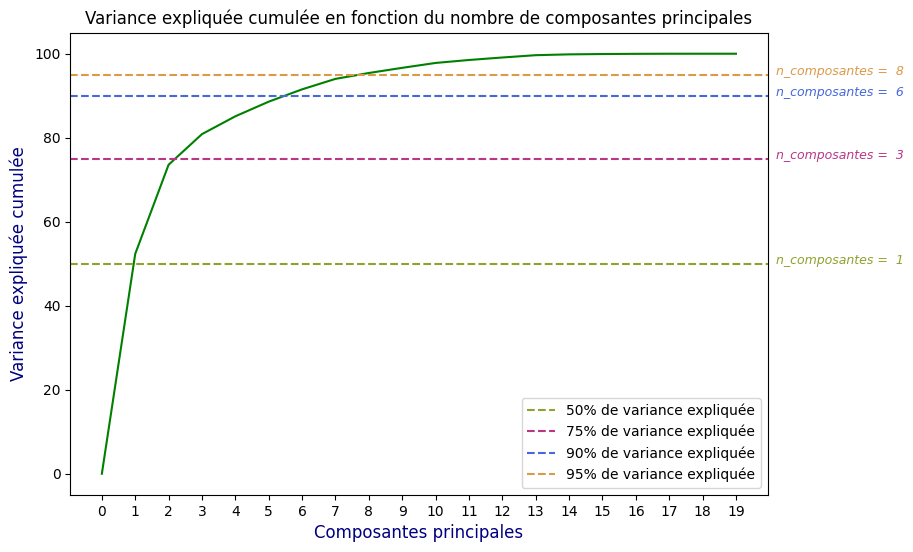

In [27]:
fig = plt.figure(figsize=(9,6))

plt.plot([i for i in range(0, Cov_Mat_rank + 1)],
         pd.concat([pd.Series([0]), df_proportions['Proportions cumulées'] * 100], ignore_index=True),
         color='green')

plt.axhline(y=50, xmin=0, xmax=1, linestyle='--', color='#8EA32D', label="50% de variance expliquée")
plt.axhline(y=75, xmin=0, xmax=1, linestyle='--', color='#BA3787', label="75% de variance expliquée")
plt.axhline(y=90, xmin=0, xmax=1, linestyle='--', color='#4668DB', label="90% de variance expliquée")
plt.axhline(y=95, xmin=0, xmax=1, linestyle='--', color='#DB9A46', label="95% de variance expliquée")

plt.text(20.2, 50, "n_composantes = "+df_proportions['Proportions cumulées'].gt(0.50).idxmax()[10:], 
         fontstyle='italic', color='#8EA32D', fontsize=9)

plt.text(20.2, 75, "n_composantes = "+df_proportions['Proportions cumulées'].gt(0.75).idxmax()[10:], 
         fontstyle='italic', color='#BA3787', fontsize=9)

plt.text(20.2, 90, "n_composantes = "+df_proportions['Proportions cumulées'].gt(0.90).idxmax()[10:], 
         fontstyle='italic', color='#4668DB', fontsize=9)

plt.text(20.2, 95, "n_composantes = "+df_proportions['Proportions cumulées'].gt(0.95).idxmax()[10:], 
         fontstyle='italic', color='#DB9A46', fontsize=9)

plt.xlabel("Composantes principales", color='navy', fontsize=12)
plt.xticks(np.arange(0, Cov_Mat_rank + 1))
plt.ylabel("Variance expliquée cumulée", color='navy', fontsize=12)
plt.title("Variance expliquée cumulée en fonction du nombre de composantes principales")

plt.legend()

plt.show()

On note la présence du coude dans cette courbe (pour <i>n_composantes = 3</i>). On remarque aussi qu'on peut récupérer 90% de l'information avec 6 composantes, et 95% de la variance totale avec seulement 8 composantes.

Cependant, dans notre cas, compte tenu du fait que nous disposons de seulement <b>1340</b> observations, l'application de l'Analyse en Composantes Principales (ACP) n'apporterait probablement pas de gain notable en termes de performance. En conséquence, il serait plus pertinent de continuer à travailler avec les variables originales pour conserver l'intégralité des informations disponibles.

## <span style="color: #706d22">Classification binaire</span>

### <span style="color: #1c873e;">1- GridSearchCV & RandomizedSearchCV :</span>

<b>GridSearchCV</b> est une technique d'optimisation des hyperparamètres utilisée dans les modèles d'apprentissage automatique. Son objectif est de trouver la meilleure combinaison d'hyperparamètres pour un modèle donné, afin de maximiser sa performance sur les données de validation.

La performance d'un modèle d'apprentissage automatique peut être fortement influencée par le choix de ces hyperparamètres. Trouver les meilleurs hyperparamètres peut donc améliorer la précision, la robustesse ou la généralisation du modèle. Toutefois, essayer manuellement plusieurs combinaisons peut être long et fastidieux. C'est ici qu'intervient <b>GridSearchCV</b>.

Tandis que <b>GridSearchCV</b> évalue toutes les combinaisons possibles, <b>RandomizedSearchCV</b> ne teste que des combinaisons aléatoires parmi celles possibles, jusqu'à un certain nombre d'itérations défini par le paramètre <i>n_iter</i>.

Nous allons tester les modèles suivants et les stocker (avec les paramètres optimaux qu'on trouvera à l'aide de GridSearchCV ou RandomizedSearchCV) dans un dictionnaire qu'on nommera <i>models</i> :
- KNN
- Régression logistique
- Arbres de décision
- Random Forest
- AdaBoost
- XGBoost
- SVM

In [28]:
models = {}

# Cette fonction permet d'appliquer le GridSearch ou le RandomizedSearch sur un classifier donné
def tune_model(param_grid, base_estimator, search_method, n_splits, X_train, y_train, n_iter=None):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True)
        
    if search_method == "grid":
        tuned_model = GridSearchCV(estimator=base_estimator,
                                   param_grid=param_grid,
                                   scoring='accuracy',
                                   cv=skf)
    else:
        if n_iter is None:
            raise ValueError("n_iter must be specified for RandomizedSearchCV")
        tuned_model = RandomizedSearchCV(estimator=base_estimator,
                                         param_distributions=param_grid,
                                         n_iter=n_iter, # Number of combinations
                                         scoring='accuracy',
                                         cv=skf,
                                         random_state=47)
    
    tuned_model.fit(X_train, y_train)
    
    return tuned_model

In [29]:
# Cette fonction sert à représenter sur un graphe les features les plus importantes
def plot_feature_importance(features, model_name, coefficients):
    feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', palette='viridis')

    ax.set_title('Feature Importance from '+model_name, fontsize=14, fontweight='bold')
    ax.set_xlabel('Absolute Coefficient Value', fontsize=12)
    ax.set_ylabel('Feature', fontsize=12)

    for i, v in enumerate(feature_importance['Importance']):
        ax.text(v + 0.01*max(feature_importance['Importance']), i, f'{v:.2f}', color='black', va='center', fontsize=10)

    sns.despine()

    plt.tight_layout()
    plt.show()

### <span style="color: #1c873e;">2- KNN :</span>

In [30]:
# Define the parameter grid for GridSearchCV
knn_param_grid = [
    {"weights": ["uniform","distance"], "p": [1,2], "n_neighbors": list(range(1,21))}
]

# Create a KNN classifier
knn = KNeighborsClassifier()

# Apply GridSearchCV
knn_grid_search = tune_model(param_grid=knn_param_grid,
                             base_estimator=knn,
                             search_method="grid",
                             n_splits=4,
                             X_train=X_train_scaled,
                             y_train=y_train_resampled)

models["KNN"] = knn_grid_search

print("Best parameters (KNN) : ", knn_grid_search.best_params_)
print("Best score (KNN) : ", knn_grid_search.best_score_)

Best parameters (KNN) :  {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Best score (KNN) :  0.7285535621873382


In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1,21)),
         y=knn_grid_search.cv_results_['mean_test_score'][::4],
         name="weights = 'uniform' & p = 1",
         mode='lines+markers',
         hovertemplate="weights = 'uniform'<br>p = 1<br>Number of neighbors = %{x}<br>Score = %{y}<extra></extra>"))

fig.add_trace(go.Scatter(x=list(range(1,21)),
         y=knn_grid_search.cv_results_['mean_test_score'][1::4],
         name="weights = 'distance' & p = 1",
         mode='lines+markers',
         hovertemplate="weights = 'distance'<br>p = 1<br>Number of neighbors = %{x}<br>Score = %{y}<extra></extra>"))

fig.add_trace(go.Scatter(x=list(range(1,21)),
         y=knn_grid_search.cv_results_['mean_test_score'][2::4],
         name="weights = 'uniform' & p = 2",
         mode='lines+markers',
         hovertemplate="weights = 'uniform'<br>p = 2<br>Number of neighbors = %{x}<br>Score = %{y}<extra></extra>"))

fig.add_trace(go.Scatter(x=list(range(1,21)),
         y=knn_grid_search.cv_results_['mean_test_score'][3::4],
         name="weights = 'distance' & p = 2",
         mode='lines+markers',
         hovertemplate="weights = 'distance'<br>p = 2<br>Number of neighbors = %{x}<br>Score = %{y}<extra></extra>"))

fig.update_xaxes(title="Number of neighbors", 
                 title_font=dict(size=20, family='Open Sans', color='#546E09'))

fig.update_yaxes(title="Score on the the test fold", 
                 title_font=dict(size=20, family='Open Sans', color='#546E09'))

fig.update_layout(title="GridSearchCV results (cv = 4) - KNN",
                  title_x=0.5,
                  title_font_family="Times New Roman",
                  title_font_size=22,
                  title_font_color="darkred",
                  xaxis_range=[0,21],
                  xaxis=dict(tickvals=list(range(1, 21))),
                  margin={"t": 35, "b": 20, "l": 0, "r": 0},
                  height=600,
                  showlegend=True,
                  legend=dict(orientation="h"))

fig.show()

### <span style="color: #1c873e;">3- Régression logistique :</span>

In [32]:
# Define the parameter grid for GridSearchCV
logistic_regression_param_grid = [
    {"penalty": ["l1","l2"], "class_weight": [None,"balanced"], "C": list(np.around(np.linspace(0.1, 5, num=50), 1))}
]

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=100000)

# Apply GridSearchCV
logistic_regression_grid_search = tune_model(param_grid=logistic_regression_param_grid,
                                             base_estimator=logistic_regression,
                                             search_method="grid",
                                             n_splits=4,
                                             X_train=X_train_scaled,
                                             y_train=y_train_resampled)

models["Logistic Regression"] = logistic_regression_grid_search

print("Best parameters (Logistic Regression) : ", logistic_regression_grid_search.best_params_)
print("Best score (Logistic Regression) : ", logistic_regression_grid_search.best_score_)

Best parameters (Logistic Regression) :  {'C': 1.3, 'class_weight': 'balanced', 'penalty': 'l1'}
Best score (Logistic Regression) :  0.6947990339830947


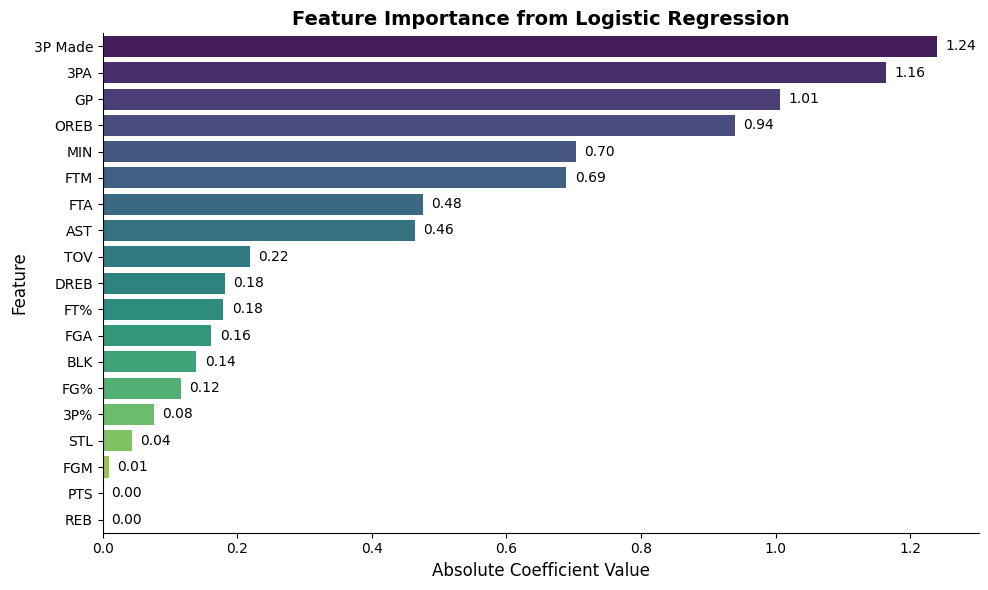

In [33]:
plot_feature_importance(features, "Logistic Regression", models["Logistic Regression"].best_estimator_.coef_[0])

In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.around(np.linspace(0.1, 5, num=50), 1),
                    y=logistic_regression_grid_search.cv_results_['mean_test_score'][::4],
                    name="class_weight = None & penalty = 'l1'",
                    mode='lines+markers',
                    hovertemplate="class_weight = None<br>penalty = 'l1'<br>C = %{x}<br>Score = %{y}<extra></extra>"))

fig.add_trace(go.Scatter(x=np.around(np.linspace(0.1, 5, num=50), 1),
                    y=logistic_regression_grid_search.cv_results_['mean_test_score'][1::4],
                    name="class_weight = None & penalty = 'l2'",
                    mode='lines+markers',
                    hovertemplate="class_weight = None<br>penalty = 'l2'<br>C = %{x}<br>Score = %{y}<extra></extra>"))

fig.add_trace(go.Scatter(x=np.around(np.linspace(0.1, 5, num=50), 1),
                    y=logistic_regression_grid_search.cv_results_['mean_test_score'][2::4],
                    name="class_weight = 'balanced' & penalty = 'l1'",
                    mode='lines+markers',
                    hovertemplate="class_weight = 'balanced'<br>penalty = 'l1'<br>C = %{x}<br>Score = %{y}<extra></extra>"))

fig.add_trace(go.Scatter(x=np.around(np.linspace(0.1, 5, num=50), 1),
                    y=logistic_regression_grid_search.cv_results_['mean_test_score'][3::4],
                    name="class_weight = 'balanced' & penalty = 'l2'",
                    mode='lines+markers',
                    hovertemplate="class_weight = 'balanced'<br>penalty = 'l2'<br>C = %{x}<br>Score = %{y}<extra></extra>"))

fig.update_xaxes(title="Regularization parameter C", 
                 title_font=dict(size=20, family='Open Sans', color='#546E09'))

fig.update_yaxes(title="Score on the the test fold", 
                 title_font=dict(size=20, family='Open Sans', color='#546E09'))

fig.update_layout(title="GridSearchCV results (cv = 4) - Logistic Regression",
                  title_x=0.5,
                  title_font_family="Times New Roman",
                  title_font_size=22,
                  title_font_color="darkred",
                  xaxis_range=[0,5.1],
                  xaxis=dict(tickvals=[0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]),
                  margin={"t": 35, "b": 20, "l": 0, "r": 0},
                  height=600,
                  showlegend=True,
                  legend=dict(orientation="h"))

fig.show()

### <span style="color: #1c873e;">4- Arbres de décision :</span>

In [35]:
# Define the parameter grid for GridSearchCV
decision_tree_param_grid = [
    {"criterion": ["gini","entropy"],
     "splitter": ["best","random"],
     "max_depth": list(range(2, 21)),
     "max_features": list(range(1, 11))}
]

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Apply GridSearchCV
decision_tree_grid_search = tune_model(param_grid=decision_tree_param_grid,
                                       base_estimator=decision_tree,
                                       search_method="grid",
                                       n_splits=4,
                                       X_train=X_train_scaled,
                                       y_train=y_train_resampled)

models["Decision Tree"] = decision_tree_grid_search

print("Best parameters (Decision Tree) : ", decision_tree_grid_search.best_params_)
print("Best score (Decision Tree) : ", decision_tree_grid_search.best_score_)

Best parameters (Decision Tree) :  {'criterion': 'entropy', 'max_depth': 13, 'max_features': 9, 'splitter': 'random'}
Best score (Decision Tree) :  0.7065378644126272


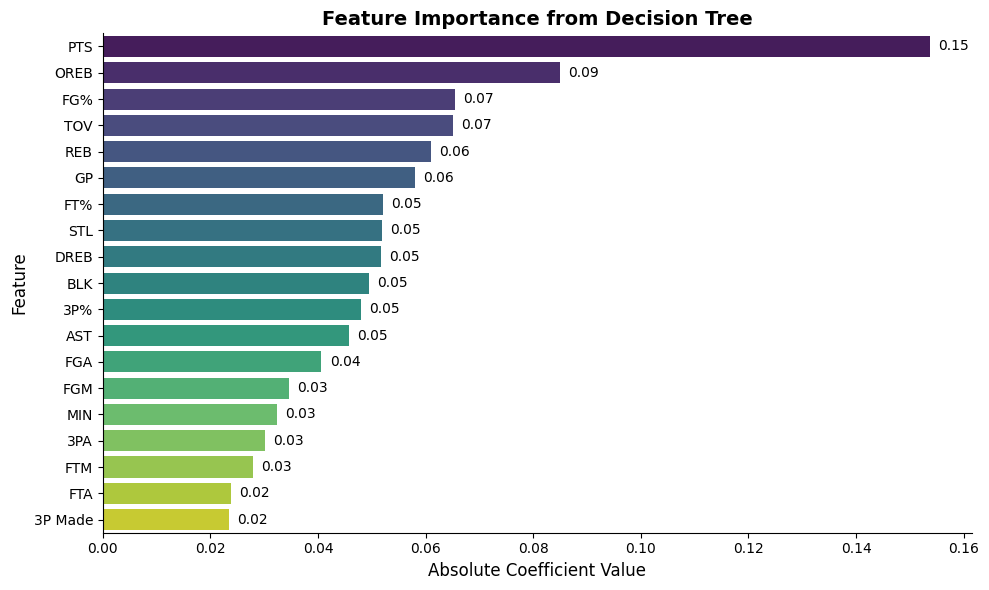

In [36]:
plot_feature_importance(features, "Decision Tree", models["Decision Tree"].best_estimator_.feature_importances_)

### <span style="color: #1c873e;">5- Random Forest :</span>

En raison du grand nombre de paramètre et de la complexité du modèle, nous allons utiliser le <i>RandomizedSearchCV</i> (100 combinaisons aléatoires).

In [37]:
# Define the parameter grid for RandomizedSearchCV
random_forest_param_grid = [
    {"criterion": ["gini","entropy"],
     "class_weight": [None,"balanced","balanced_subsample"],
     "n_estimators": list(range(1, 21)),
     "max_depth": list(range(2, 21)),
     "max_features": list(range(1, 11))}
]

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Apply RandomizedSearchCV
random_forest_grid_search = tune_model(param_grid=random_forest_param_grid,
                                       base_estimator=random_forest,
                                       search_method="randomized",
                                       n_splits=4,
                                       X_train=X_train_scaled,
                                       y_train=y_train_resampled,
                                       n_iter=100)

models["Random Forest"] = random_forest_grid_search

print("Best parameters (Random Forest) : ", random_forest_grid_search.best_params_)
print("Best score (Random Forest) : ", random_forest_grid_search.best_score_)

Best parameters (Random Forest) :  {'n_estimators': 17, 'max_features': 7, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best score (Random Forest) :  0.7549723995169915


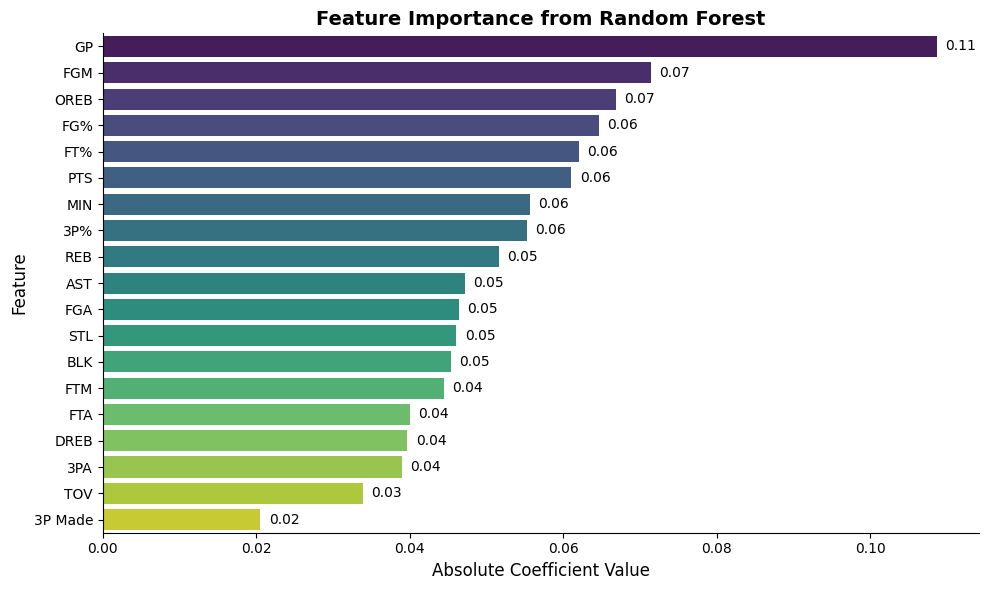

In [38]:
plot_feature_importance(features, "Random Forest", models["Random Forest"].best_estimator_.feature_importances_)

### <span style="color: #1c873e;">6- AdaBoost :</span>

En raison du grand nombre de paramètre et de la complexité du modèle, nous allons utiliser le <i>RandomizedSearchCV</i> (30 combinaisons aléatoires).

In [39]:
# Define the parameter grid for RandomizedSearchCV
adaboost_param_grid = [
    {"n_estimators": list(np.linspace(40,200,num=5).astype(int)),
     "learning_rate": list(np.around(np.linspace(0.1,1,num=10),1)),
     "estimator__max_depth": [1,3,5],
     "estimator__criterion": ["gini", "entropy"]}
]

# Create a AdaBoost classifier
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Apply RandomizedSearchCV
adaboost_grid_search = tune_model(param_grid=adaboost_param_grid,
                                  base_estimator=adaboost,
                                  search_method="randomized",
                                  n_splits=4,
                                  X_train=X_train_scaled,
                                  y_train=y_train_resampled,
                                  n_iter=30)

models["AdaBoost"] = adaboost_grid_search

print("Best parameters (AdaBoost) : ", adaboost_grid_search.best_params_)
print("Best score (AdaBoost) : ", adaboost_grid_search.best_score_)

Best parameters (AdaBoost) :  {'n_estimators': 120, 'learning_rate': 0.2, 'estimator__max_depth': 5, 'estimator__criterion': 'entropy'}
Best score (AdaBoost) :  0.7491072968776953


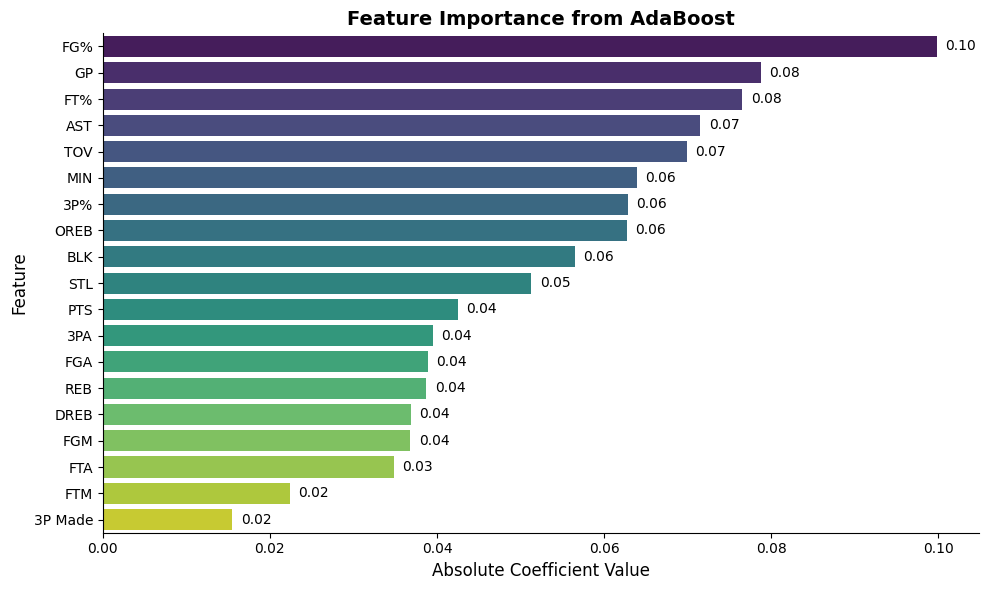

In [40]:
plot_feature_importance(features, "AdaBoost", models["AdaBoost"].best_estimator_.feature_importances_)

### <span style="color: #1c873e;">7- XGBoost :</span>

En raison du grand nombre de paramètre et de la complexité du modèle, nous allons utiliser le <i>RandomizedSearchCV</i> (30 combinaisons aléatoires).

In [41]:
# Define the parameter grid for RandomizedSearchCV
xgboost_param_grid = [
    {"n_estimators": list(np.linspace(40,200,num=5).astype(int)),
     "learning_rate": list(np.around(np.linspace(0.1,1,num=10),1)),
     "max_depth": [1,3,5]}
]

# Create a XGBoost classifier
xgb = xgboost.XGBClassifier()

# Apply RandomizedSearchCV
xgboost_grid_search = tune_model(param_grid=xgboost_param_grid,
                                 base_estimator=xgb,
                                 search_method="randomized",
                                 n_splits=4,
                                 X_train=X_train_scaled,
                                 y_train=y_train_resampled,
                                 n_iter=30)

models["XGBoost"] = xgboost_grid_search

print("Best parameters (XGBoost) : ", xgboost_grid_search.best_params_)
print("Best score (XGBoost) : ", xgboost_grid_search.best_score_)

Best parameters (XGBoost) :  {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.3}
Best score (XGBoost) :  0.7520096601690529


### <span style="color: #1c873e;">8- SVM :</span>

En raison du grand nombre de paramètre et de la complexité du modèle, nous allons utiliser le <i>RandomizedSearchCV</i> (30 combinaisons aléatoires).

In [42]:
# Define the parameter grid for RandomizedSearchCV
svm_param_grid = [
    {"C": list(np.around(np.linspace(0.1, 5, num=50), 1)),
     "kernel": ["linear"],
     "class_weight": [None,"balanced"]},
    {"C": list(np.around(np.linspace(0.1, 5, num=50), 1)),
     "kernel": ["poly"],
     "degree": [1,2,3],
     "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
     "class_weight": [None,"balanced"]},
    {"C": list(np.around(np.linspace(0.1, 5, num=50), 1)),
     "kernel": ["rbf","sigmoid"],
     "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
     "class_weight": [None,"balanced"]}
]

# Create a SVM classifier
svm = SVC(probability=True)

# Apply RandomizedSearchCV
svm_grid_search = tune_model(param_grid=svm_param_grid,
                             base_estimator=svm,
                             search_method="randomized",
                             n_splits=4,
                             X_train=X_train_scaled,
                             y_train=y_train_resampled,
                             n_iter=30)

models["SVM"] = svm_grid_search

print("Best parameters (SVM) : ", svm_grid_search.best_params_)
print("Best score (SVM) : ", svm_grid_search.best_score_)

Best parameters (SVM) :  {'kernel': 'rbf', 'gamma': 1, 'class_weight': None, 'C': 2.1}
Best score (SVM) :  0.7556969121959634


### <span style="color: #1c873e;">9- Résultats et conclusions :</span>

#### <span style="color: #c11568;">1- Le meilleur modèle :</span>

In [43]:
print(tabulate([(model_name, model.best_score_) for model_name, model in models.items()],
               headers=["Modèle", "Meilleur score (Accuracy)"],
               tablefmt="grid"))

+---------------------+-----------------------------+
| Modèle              |   Meilleur score (Accuracy) |
+=====================+=============================+
| KNN                 |                    0.728554 |
+---------------------+-----------------------------+
| Logistic Regression |                    0.694799 |
+---------------------+-----------------------------+
| Decision Tree       |                    0.706538 |
+---------------------+-----------------------------+
| Random Forest       |                    0.754972 |
+---------------------+-----------------------------+
| AdaBoost            |                    0.749107 |
+---------------------+-----------------------------+
| XGBoost             |                    0.75201  |
+---------------------+-----------------------------+
| SVM                 |                    0.755697 |
+---------------------+-----------------------------+


In [44]:
best_model_name = max(models, key=lambda model_name: models[model_name].best_score_)
best_model = models[best_model_name].best_estimator_

print(f"Le modèle le plus performant est : {best_model_name}")
print(f"Avec un score (Accuracy) de : {models[best_model_name].best_score_}")

Le modèle le plus performant est : SVM
Avec un score (Accuracy) de : 0.7556969121959634


#### <span style="color: #c11568;">2- Prédictions sur le set de test :</span>

Nous allons maintenant tester ce modèle sur les données de test :

In [45]:
y_pred = best_model.predict(X_test_scaled)

print("Accuracy      : ", accuracy_score(y_test, y_pred))
print("Recall        : ", recall_score(y_test, y_pred))
print("Precision     : ", precision_score(y_test, y_pred))
print("F1-score      : ", f1_score(y_test, y_pred))
print("Jaccard Index : ", jaccard_score(y_test, y_pred))

Accuracy      :  0.6529850746268657
Recall        :  0.8253012048192772
Precision     :  0.681592039800995
F1-score      :  0.7465940054495913
Jaccard Index :  0.5956521739130435


#### <span style="color: #c11568;">3- Matrice de confusion :</span>

La matrice de confusion est une matrice qui mesure la qualité d'un système de classification. Chaque ligne correspond à une classe réelle, chaque colonne correspond à une classe estimée. La cellule ligne L, colonne C contient le nombre d'éléments de la classe réelle L qui ont été estimés comme appartenant à la classe C.

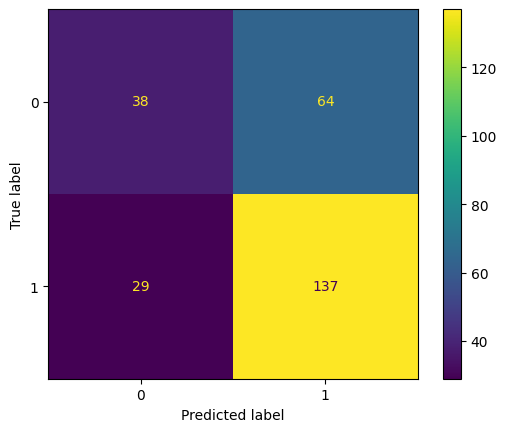

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

- TP (True Positive) : Prédictions correctes de la classe positive (1).
- TN (True Negative) : Prédictions correctes de la classe négative (0).
- FP (False Positive) : Cas où l'on prédit incorrectement la classe positive.
- FN (False Negative) : Cas où l'on prédit incorrectement la classe négative.

<b>L'Accuracy</b> mesure le pourcentage de prédictions correctes parmi toutes les prédictions.

$$ Accuracy = \frac{\text{correct classifications}}{\text{total classifications}} = \frac{TP + TN}{TP + TN + FP + FN} $$
<br>

Le <b>Recall</b> mesure la capacité du modèle à détecter les instances positives (la proportion des vrais positifs parmi les réels positifs). Le recall est privilégié lorsque les faux négatifs (FN) sont coûteux ou dangereux. Autrement dit, il est crucial de détecter toutes les instances positives, même si cela signifie générer plus de faux positifs.

$$ Recall = \frac{\text{correctly classified actual positives}}{\text{all actual positives}} = \frac{TP}{TP + FN} $$
<br>

La <b>Précision</b> mesure la proportion des prédictions positives qui sont correctes (la fraction des vrais positifs parmi les prédictions positives). La precision est privilégiée lorsque les faux positifs (FP) sont coûteux ou gênants. Autrement dit, il est essentiel que les instances positives prédites soient fiables, même si cela signifie en rater quelques-unes.

$$ Precision = \frac{\text{correctly classified actual positives}}{\text{everything classified as positive}} = \frac{TP}{TP + FP} $$
<br>

Le <b>F1-score</b> est la moyenne harmonique entre la précision et le rappel. Il permet de trouver un équilibre entre ces deux métriques, surtout lorsqu'elles sont en conflit.

$$ F1-score = \frac{2 \times Precision \times Recall}{Precision + Recall} $$
<br>

Le <b>Jaccard Index</b> est une métrique qui compare l'intersection entre les prédictions positives et les réels positifs par rapport à leur union.

$$ Jaccard = \frac{TP}{TP + FP + FN} $$

<b>Dans notre cas, les Faux Positifs sont coûteux. Investir sur un joueur qui ne vaut pas le coup nous fera perdre de l'argent. Nous allons donc privilégier la Précision. Cela nous permettra de minimiser les pertes.</b>

#### <span style="color: #c11568;">4- Courbe ROC et courbe Précision-Rappel :</span>

Le seuil de classification est un paramètre crucial dans les modèles de classification binaire. Il correspond à la probabilité à partir de laquelle une instance est attribuée à la classe positive (1). Par défaut, ce seuil est souvent fixé à 0,5, ce qui signifie que si un modèle prédit une probabilité supérieure ou égale à 0,5 pour une instance, celle-ci sera classée comme positive, sinon elle sera classée comme négative (0). Cependant, ce seuil peut être ajusté en fonction des objectifs spécifiques du projet.

La courbe ROC est une représentation visuelle des performances du modèle pour tous les seuils. La courbe ROC est dessinée en calculant le taux de vrais positifs (TPR). et de le taux de faux positifs (FPR) pour chaque seuil possible.

$$ TPR = Recall = \frac{\text{correctly classified actual positives}}{\text{all actual positives}} = \frac{TP}{TP + FN} $$

$$ FPR = \frac{\text{incorrectly classified actual negatives}}{\text{all actual negatives}} = \frac{FP}{FP + TN} $$

L'AUC est l'aire sous la courbe ROC.

In [47]:
# Calculate tpr (recall), fpr and precision for multiple thresholds
def calculate_metrics(y_test, y_proba, thresholds):
    tpr = np.array([])
    fpr = np.array([])
    precision = np.array([])
    
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        
        current_tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Recall) for the current threshold
        current_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate for the current threshold
        current_precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision for the current threshold
        
        tpr = np.append(tpr, current_tpr)
        fpr = np.append(fpr, current_fpr)
        precision = np.append(precision, current_precision)
        
    return tpr, fpr, precision

In [48]:
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
thresholds = np.linspace(1, 0, 201)

tpr, fpr, precision = calculate_metrics(y_test, y_proba, thresholds)

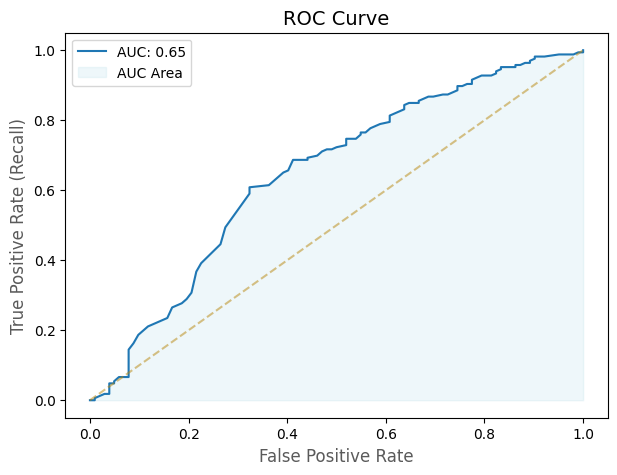

In [49]:
fig = plt.figure(figsize=(7,5))

plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], '--', color='darkgoldenrod', alpha=0.5)
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.2, label='AUC Area')

plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate", color='#5a5a5a', fontsize=12)
plt.ylabel("True Positive Rate (Recall)", color='#5a5a5a', fontsize=12)

plt.legend(loc='best')
plt.show()

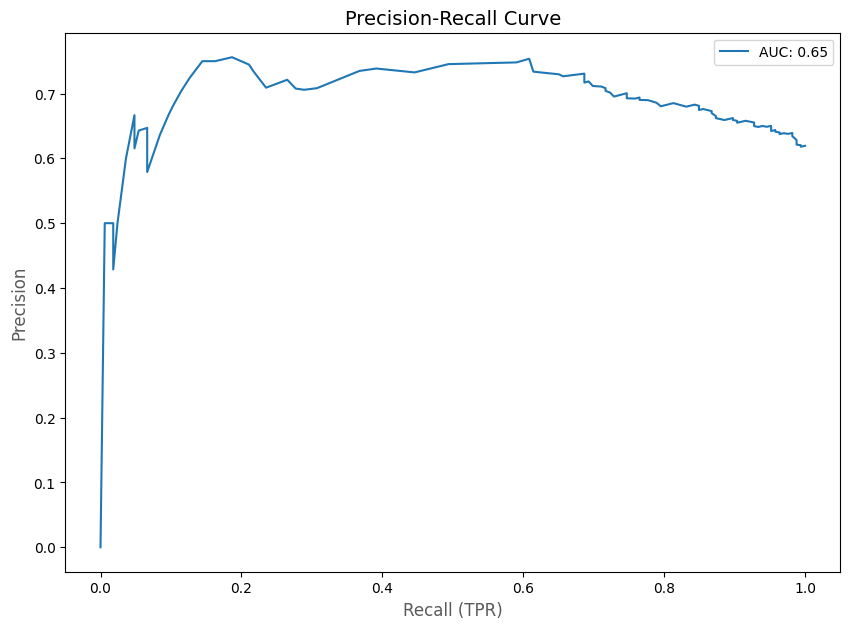

In [50]:
fig = plt.figure(figsize=(10,7))

plt.plot(tpr, precision, label=f'AUC: {roc_auc_score(y_test, y_proba):.2f}')

plt.title("Precision-Recall Curve", fontsize=14)
plt.xlabel("Recall (TPR)", color='#5a5a5a', fontsize=12)
plt.ylabel("Precision", color='#5a5a5a', fontsize=12)

plt.legend(loc='best')
plt.show()

Nous allons jouer sur la précision. Nous voulons atteindre une précision de 0.75.

In [51]:
target_precision = 0.75
optimal_threshold = thresholds[np.where(precision == np.min(precision[(precision > target_precision)]))[0][0]]

tpr_optimal = tpr[np.where(thresholds == optimal_threshold)[0][0]]
fpr_optimal = fpr[np.where(thresholds == optimal_threshold)[0][0]]
precision_optimal = precision[np.where(thresholds == optimal_threshold)[0][0]]

tpr_50 = tpr[np.where(thresholds == 0.5)[0][0]] # TPR for threshold = 0.5
fpr_50 = fpr[np.where(thresholds == 0.5)[0][0]] # FPR for threshold = 0.5
precision_50 = precision[np.where(thresholds == 0.5)[0][0]] # Precision for threshold = 0.5

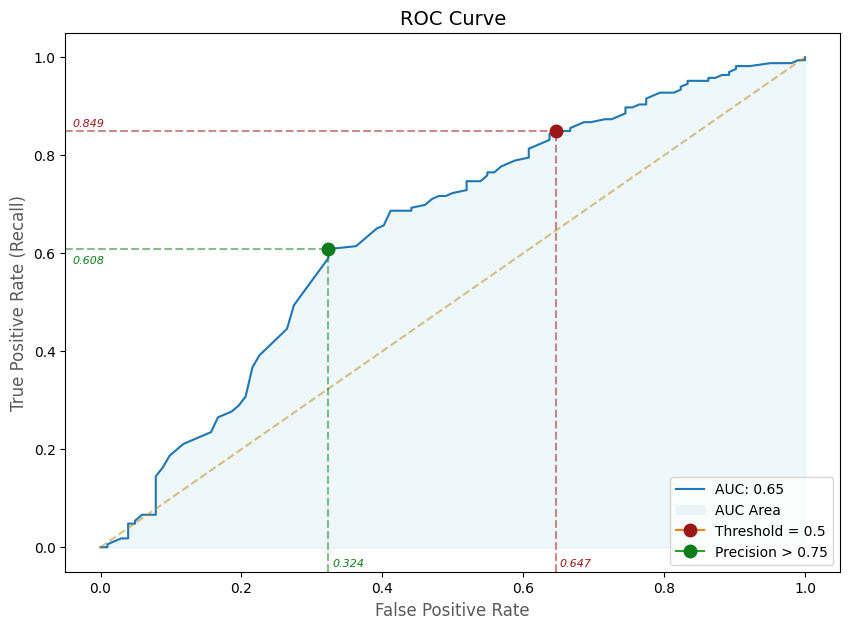

In [52]:
fig = plt.figure(figsize=(10,7))

plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], '--', color='darkgoldenrod', alpha=0.5)
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.2, label='AUC Area')

plt.plot(fpr_50, tpr_50, marker='o', markersize=9, markeredgecolor='#9b1616',
         markerfacecolor='#9b1616', label="Threshold = 0.5")

plt.plot(fpr_optimal, tpr_optimal, marker='o', markersize=9, markeredgecolor='#0f7c1b',
         markerfacecolor='#0f7c1b', label="Precision > "+str(target_precision))

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax_50 = (fpr_50-x_min)/(x_max-x_min)
ymax_50 = (tpr_50-y_min)/(y_max-y_min)
plt.axhline(y=tpr_50, xmin=0, xmax=xmax_50, linestyle='--', color='#9b1616', alpha=0.5)
plt.axvline(x=fpr_50, ymin=0, ymax=ymax_50, linestyle='--', color='#9b1616', alpha=0.5)
plt.text(x_min+0.01, tpr_50+0.01, str(round(tpr_50,3)), fontstyle='italic', color='#9b1616', fontsize=8)
plt.text(fpr_50+0.005, y_min+0.01, str(round(fpr_50,3)), fontstyle='italic', color='#9b1616', fontsize=8)

xmax_optim = (fpr_optimal-x_min)/(x_max-x_min)
ymax_optim = (tpr_optimal-y_min)/(y_max-y_min)
plt.axhline(y=tpr_optimal, xmin=0, xmax=xmax_optim, linestyle='--', color='#0f7c1b', alpha=0.5)
plt.axvline(x=fpr_optimal, ymin=0, ymax=ymax_optim, linestyle='--', color='#0f7c1b', alpha=0.5)
plt.text(x_min+0.01, tpr_optimal-0.03, str(round(tpr_optimal,3)), fontstyle='italic', color='#0f7c1b', fontsize=8)
plt.text(fpr_optimal+0.005, y_min+0.01, str(round(fpr_optimal,3)), fontstyle='italic', color='#0f7c1b', fontsize=8)

plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate", color='#5a5a5a', fontsize=12)
plt.ylabel("True Positive Rate (Recall)", color='#5a5a5a', fontsize=12)

plt.legend(loc='lower right')
plt.show()

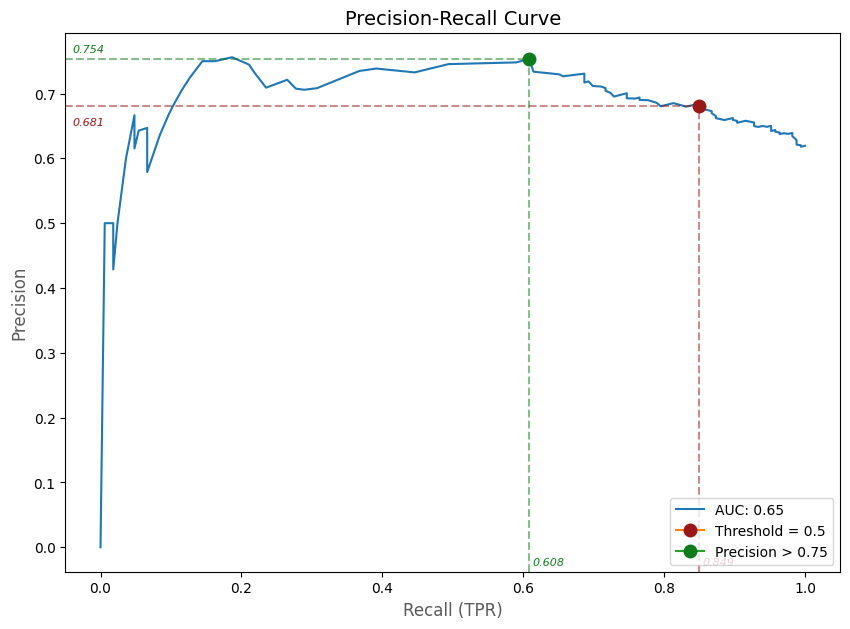

In [53]:
fig = plt.figure(figsize=(10,7))

plt.plot(tpr, precision, label=f'AUC: {roc_auc_score(y_test, y_proba):.2f}')

plt.plot(tpr_50, precision_50, marker='o', markersize=9, markeredgecolor='#9b1616', 
         markerfacecolor='#9b1616', label="Threshold = 0.5")

plt.plot(tpr_optimal, precision_optimal, marker='o', markersize=9, markeredgecolor='#0f7c1b', 
         markerfacecolor='#0f7c1b', label="Precision > "+str(target_precision))

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax_50 = (tpr_50-x_min)/(x_max-x_min)
ymax_50 = (precision_50-y_min)/(y_max-y_min)
plt.axhline(y=precision_50, xmin=0, xmax=xmax_50, linestyle='--', color='#9b1616', alpha=0.5)
plt.axvline(x=tpr_50, ymin=0, ymax=ymax_50, linestyle='--', color='#9b1616', alpha=0.5)
plt.text(x_min+0.01, precision_50-0.03, str(round(precision_50,3)), fontstyle='italic', color='#9b1616', fontsize=8)
plt.text(tpr_50+0.005, y_min+0.01, str(round(tpr_50,3)), fontstyle='italic', color='#9b1616', fontsize=8)

xmax_optim = (tpr_optimal-x_min)/(x_max-x_min)
ymax_optim = (precision_optimal-y_min)/(y_max-y_min)
plt.axhline(y=precision_optimal, xmin=0, xmax=xmax_optim, linestyle='--', color='#0f7c1b', alpha=0.5)
plt.axvline(x=tpr_optimal, ymin=0, ymax=ymax_optim, linestyle='--', color='#0f7c1b', alpha=0.5)
plt.text(x_min+0.01, precision_optimal+0.01, str(round(precision_optimal,3)), fontstyle='italic', color='#0f7c1b', fontsize=8)
plt.text(tpr_optimal+0.005, y_min+0.01, str(round(tpr_optimal,3)), fontstyle='italic', color='#0f7c1b', fontsize=8)

plt.title("Precision-Recall Curve", fontsize=14)
plt.xlabel("Recall (TPR)", color='#5a5a5a', fontsize=12)
plt.ylabel("Precision", color='#5a5a5a', fontsize=12)

plt.legend(loc='best')
plt.show()

#### <span style="color: #c11568;">5- Prédictions avec le nouveau seuil de classification :</span>

In [54]:
print("Le nouveau seuil est égal à : ", optimal_threshold)

Le nouveau seuil est égal à :  0.73


In [55]:
y_pred = (y_proba >= optimal_threshold).astype(int)

print("Accuracy      : ", accuracy_score(y_test, y_pred))
print("Recall        : ", recall_score(y_test, y_pred))
print("Precision     : ", precision_score(y_test, y_pred))
print("F1-score      : ", f1_score(y_test, y_pred))
print("Jaccard Index : ", jaccard_score(y_test, y_pred))

Accuracy      :  0.6343283582089553
Recall        :  0.608433734939759
Precision     :  0.753731343283582
F1-score      :  0.6733333333333332
Jaccard Index :  0.507537688442211


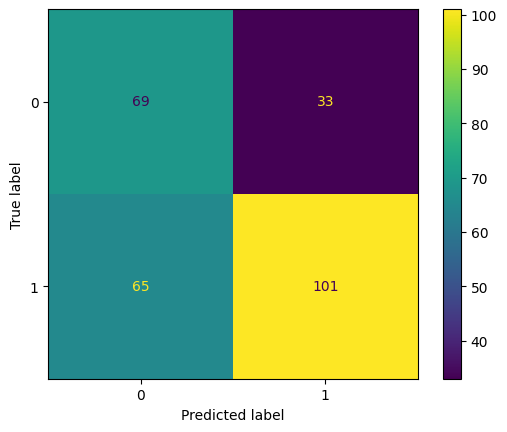

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

Avec ce nouveau seuil, nous avons réussi à obtenir moins de faux positifs et à augmenter la précision.

In [57]:
# Save the best model to a file
with open('Web_App/best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [58]:
# Save the robust scaler to a file
with open('Web_App/robust_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(robust_scaler, scaler_file)

Nous allons charger le modèle et le scaler dans notre fichier Python afin de les utiliser pour notre web service. Nous allons aussi avoir besoin du seuil de classification pour faire les prédictions :

In [59]:
print("Le seuil de classification est égal à : ", optimal_threshold)

Le seuil de classification est égal à :  0.73
